<a href="https://colab.research.google.com/github/mezgoodle/TelegramiaStats/blob/master/telegramia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns

# Hero classes

## Getting the data

In [45]:
df = pd.read_json('https://telegramia-api.herokuapp.com/heroclasses')

In [46]:
df.head()

,_id,name,characteristics,choices
0,60fef6e7cede4b58a0ab1c82,Воїн,"{'strength': 10.0, 'agility': 5.0, 'intuition'...",1
1,60fef743cede4b58a0ab1c83,Шахрай,"{'strength': 5.0, 'agility': 10.0, 'intuition'...",12
2,60fef797cede4b58a0ab1c84,Слідопит,"{'strength': 5.0, 'agility': 5.0, 'intuition':...",3
3,60fef817132dc80a96690553,Маг,"{'strength': 5.0, 'agility': 5.0, 'intuition':...",3


## Data pre-processing

In [47]:
df.rename(columns={'_id': 'id'}, inplace=True)

In [48]:
df.isna().sum()

id                 0
name               0
characteristics    0
choices            0
dtype: int64

## Data analysis

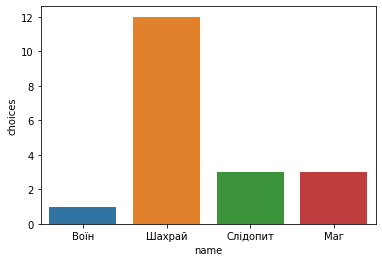

In [49]:
sns.barplot(x='name', y='choices', data=df)

As we can see, players choose class **"Шахрай"** most of all and **"Воїн"** least of all.

# Roads

## Getting the data

In [50]:
df = pd.read_json('https://telegramia-api.herokuapp.com/roads')

In [51]:
df

,_id,from_obj,to_obj,name,energy,travelers
0,610e5cfb5045fd6efd063935,Брісвель,Хоул Чиппинг,Дорога на захід,13.4,12
1,610e5db636d932eb3953dd1d,Брісвель,Белсон,Широка лісна дорога,11.7,5
2,61ff7fadbd954c857f36caa1,Брісвель,Dungeon,Дорого у Місячний ліс,13.4,2
3,6200c38df8ab4f7e167bd9da,Dungeon,Брісвель,З Місячного лісу у Брісвель,13.4,9
4,6238449c9a593545ead2857f,Брісвель,raid,На пошуки Долі,1.4,15
5,623844bff7f5c7e4189b19ee,raid,Брісвель,Назад у Брісвель,1.4,7


In [52]:
df.head()

,_id,from_obj,to_obj,name,energy,travelers
0,610e5cfb5045fd6efd063935,Брісвель,Хоул Чиппинг,Дорога на захід,13.4,12
1,610e5db636d932eb3953dd1d,Брісвель,Белсон,Широка лісна дорога,11.7,5
2,61ff7fadbd954c857f36caa1,Брісвель,Dungeon,Дорого у Місячний ліс,13.4,2
3,6200c38df8ab4f7e167bd9da,Dungeon,Брісвель,З Місячного лісу у Брісвель,13.4,9
4,6238449c9a593545ead2857f,Брісвель,raid,На пошуки Долі,1.4,15


## Data pre-processing

In [53]:
df.rename(columns={'_id': 'id'}, inplace=True)

In [54]:
df.isna().sum()

id           0
from_obj     0
to_obj       0
name         0
energy       0
travelers    0
dtype: int64

## Data analysis

[Text(0, 0, 'Дорога на захід'),
 Text(0, 0, 'Широка лісна дорога'),
 Text(0, 0, 'Дорого у Місячний ліс'),
 Text(0, 0, 'З Місячного лісу у Брісвель'),
 Text(0, 0, 'На пошуки Долі'),
 Text(0, 0, 'Назад у Брісвель')]

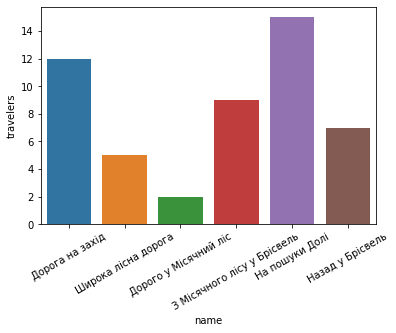

In [55]:
plot = sns.barplot(x='name', y='travelers', data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


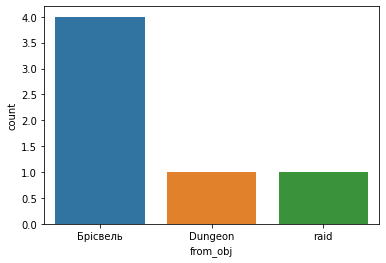

In [56]:
sns.countplot(df['from_obj'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


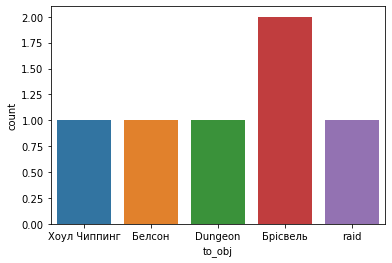

In [57]:
sns.countplot(df['to_obj'])

As we can see, players choose class **"Шахрай"** most of all and **"Воїн"** least of all.

In [58]:
df.groupby('energy')['travelers'].agg(['count', 'mean'])

,count,mean
energy,,
1.4,2,11.000000
11.7,1,5.000000
13.4,3,7.666667


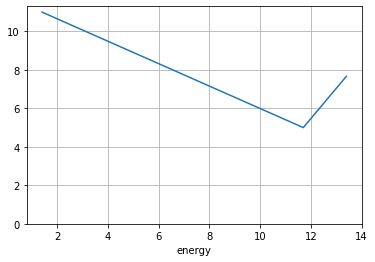

In [59]:
df.groupby('energy')['travelers'].mean().plot(ylim=0, grid=True)

Чим менша енергія витрачається на подорож, тим більше подорожувальників

# Players

## Getting the data

In [60]:
df = pd.read_json('https://telegramia-api.herokuapp.com/players')

In [61]:
df.head()

,_id,user_id,telegram_name,name,level,experience,health,energy,strength,agility,intuition,intelligence,hero_class,nation,money,items,mount,current_state
0,610e513b7250b75616ed056d,353057906,sylvenis,Sylvenis,32,0.886508,61.482,221.1,10.0,5.0,5.0,15,Воїн,Пріаріа,210065.741,[Wood helmet 2],"{'_id': '61f7b9765bcacf5d94ddd52e', 'name': 'К...",Брісвель
1,623ed5663eb807f0ddba2bd3,34344334,mezgoodle,Jane Doe,3,45.000000,100.000,30.0,11.4,3.2,55.1,34,paladin,Priaria,123.650,"[wood shield, helmet]","{'name': 'Bob', 'type': 'horse', 'bonus': 12}",Stormwind


## Data pre-processing

In [62]:
df.rename(columns={'_id': 'id'}, inplace=True)

In [63]:
df = df[df.name != "Jane Doe"]

In [64]:
df.isna().sum()

id               0
user_id          0
telegram_name    0
name             0
level            0
experience       0
health           0
energy           0
strength         0
agility          0
intuition        0
intelligence     0
hero_class       0
nation           0
money            0
items            0
mount            0
current_state    0
dtype: int64

In [76]:
df['mount'] = df['mount'][0]['name']

In [77]:
df.head()

,id,user_id,telegram_name,name,level,experience,health,energy,strength,agility,intuition,intelligence,hero_class,nation,money,items,mount,current_state
0,610e513b7250b75616ed056d,353057906,sylvenis,Sylvenis,32,0.886508,61.482,221.1,10.0,5.0,5.0,15,Воїн,Пріаріа,210065.741,[Wood helmet 2],Кінь для практики,Брісвель


## Data analysis

In [83]:
df['level_group'] = pd.qcut(df['level'])

TypeError: ignored

In [80]:
df.groupby('level_group')['money'].agg(['count', 'mean'])

,count,mean
level,,
32,1,210065.741


In [ ]:
df.groupby('level_group')['money'].mean().plot(ylim=0, grid=True)

In [86]:
df['mount'].value_counts()

Кінь для практики    1
Name: mount, dtype: int64